# Use ML to predict the Heart Disease Motality based on the social local policies and life styles

### Target is classified in 4 categories
---
    4. High Rate
    3. Medium Rate
    2. Med-Low Rate
    1. Low Rate


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load all dependencies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [3]:
#connect to database
path = "model/db/HeartDiseaseByCounty.db"
cnx = sqlite3.connect(path)

In [4]:
#Read dataframe from SQL query
df = pd.read_sql_query("SELECT f.*, t.Level FROM \
                        Features_State_Counties f \
                        JOIN State s ON f.State_Name = s.Name \
                        JOIN Heart_Disease_Mortality_State_Counties as t ON f.County = t.County AND s.Code = t.State_Code" \
                       , cnx)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Largest_sector,Level
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,2376.0,321,544.0,358,1061,882,336,878,Manufacturing,1
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,4237.0,579,550.0,459,1664,1309,675,1616,Manufacturing,1
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,223530.0,37266,27075.0,11867,45753,66655,67719,99544,"Educational services, and health care and soci...",1
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,13584.0,1661,5869.0,1798,4371,2314,1194,8539,"Educational services, and health care and soci...",2
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,615.0,143,96.0,36,225,240,144,232,Public administration,1


In [5]:
# View statistics dataframe columns
df.describe()

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Uninsured,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Level
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3071.000000,3.071000e+03,3.072000e+03,3.071000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3072.000000
mean,17.832357,3.972363,4.149642,17.361979,32.817708,7.424577,27.353516,62.892578,17.485677,11.504232,...,8977.153696,7.683507e+04,1.892521e+04,1.330867e+04,8.599790e+03,1.891054e+04,2.031700e+04,2.208112e+04,3.480105e+04,2.469727
std,4.704372,0.696459,0.592199,3.548037,5.430713,1.270692,5.692320,23.424658,3.176629,5.190727,...,35474.297222,2.526495e+05,5.313433e+04,4.601938e+04,3.762167e+04,5.130057e+04,6.145624e+04,8.044333e+04,1.125637e+05,1.104914
min,8.000000,2.400000,2.500000,6.000000,12.000000,0.000000,10.000000,0.000000,8.000000,0.000000,...,23.000000,1.190000e+02,1.000000e+01,5.000000e+00,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,1.900000e+01,1.000000
25%,14.000000,3.500000,3.700000,15.000000,29.000000,6.900000,24.000000,49.000000,15.000000,7.000000,...,876.500000,7.245000e+03,2.538500e+03,1.565500e+03,9.677500e+02,2.745750e+03,2.277250e+03,1.194750e+03,3.283500e+03,2.000000
50%,17.000000,3.900000,4.200000,17.000000,33.000000,7.700000,27.000000,66.000000,18.000000,11.000000,...,2140.000000,1.743800e+04,5.767000e+03,3.724000e+03,2.464500e+03,6.334000e+03,5.325500e+03,3.162500e+03,7.950500e+03,2.000000
75%,21.000000,4.400000,4.600000,20.000000,36.000000,8.200000,31.000000,80.000000,20.000000,15.000000,...,5675.500000,4.730000e+04,1.444550e+04,9.175500e+03,5.667500e+03,1.511100e+04,1.442075e+04,1.049675e+04,2.250150e+04,4.000000
max,41.000000,6.500000,6.300000,41.000000,58.000000,10.000000,50.000000,100.000000,29.000000,34.000000,...,935213.000000,7.703359e+06,1.527541e+06,1.409155e+06,1.460718e+06,1.416482e+06,1.790808e+06,2.177481e+06,3.260029e+06,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x13026eea848>,
 'caps': [<matplotlib.lines.Line2D at 0x13026fb73c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x13026ef0b48>],
 'medians': [<matplotlib.lines.Line2D at 0x13026ee4f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x13026f03cc8>],
 'means': []}

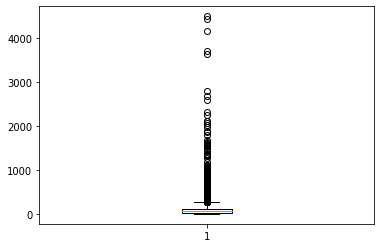

In [6]:
# This feature has so many outliers

series = df["Average_Traffic_Volume_per_Meter_of_Major_Roadways"]
plt.boxplot(series) 

In [7]:
#let drop the column
df.drop(columns=["Average_Traffic_Volume_per_Meter_of_Major_Roadways"], inplace=True)

In [8]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
College_or_associates                          3072
Bachelor_degree_or_higher                      3072
Unreported_education                           3072
Largest_sector                                 3072
Level                                          3072
Length: 68, dtype: int64

In [9]:
# Find columns that contain NULL value
col_null = list(col_count[col_count != 3072].index)
col_null

['Household_Income_AIAN',
 'Household_Income_Asian',
 'Household_Income_Black',
 'Household_Income_Hispanic',
 'Household_Income_White',
 'Percent_Severe_Housing_Cost_Burden',
 'Percent_Children_in_Poverty',
 'Teen_Birth_Rate',
 'Uninsured',
 'Insured',
 'Poverty']

In [10]:
# drop columns
df.drop(columns=["Percent_Severe_Housing_Cost_Burden","Percent_Children_in_Poverty","Teen_Birth_Rate"], inplace=True)


In [11]:
# Fill value columns
df.fillna(value=0,inplace=True)

In [12]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
College_or_associates                          3072
Bachelor_degree_or_higher                      3072
Unreported_education                           3072
Largest_sector                                 3072
Level                                          3072
Length: 65, dtype: int64

In [13]:
# Drop Combo keys of dataframe
keys = ['State_Name', 'County']

In [14]:
# Find Object Type Columns 
obj_cols =list(df.dtypes[df.dtypes=='object'].index)
obj_cols = [ name for name in obj_cols if not name in keys]
obj_cols

['Largest_sector']

In [15]:
df[obj_cols].nunique()

Largest_sector    10
dtype: int64

In [16]:
df_encoder = pd.get_dummies(df[obj_cols])
df_encoder

,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3067,0,0,0,1,0,0,0,0,0,0
3068,0,1,0,0,0,0,0,0,0,0
3069,0,0,0,1,0,0,0,0,0,0
3070,0,0,0,1,0,0,0,0,0,0


In [17]:
# Merge the two DataFrames together and drop the Country column
df = df.merge(df_encoder,left_index=True,right_index=True)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,0,0,0,0,1,0,0,0,0,0
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,0,0,0,0,1,0,0,0,0,0
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,0,0,0,1,0,0,0,0,0,0
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,0,0,0,1,0,0,0,0,0,0
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,0,0,0,0,0,0,1,0,0,0


In [18]:
# Drop column list
# Column Level is Target
drop_cols = keys + obj_cols + ["Level"]
# Target
y = df["Level"].values
print(y[:5])
# Create our features
X = df.drop(columns= drop_cols)
X.head()

[1 1 1 2 1]


,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,"Largest_sector_Agriculture, forestry, fishing and hunting, and mining","Largest_sector_Arts, entertainment, and recreation, and accommodation and food services",Largest_sector_Construction,"Largest_sector_Educational services, and health care and social assistance",Largest_sector_Manufacturing,"Largest_sector_Professional, scientific, and management, and administrative and waste management services",Largest_sector_Public administration,Largest_sector_Retail trade,Largest_sector_Unknown,Largest_sector_Wholesale trade
0,17,3.4,2.8,17,51,5.3,30,100,17,28,...,0,0,0,0,1,0,0,0,0,0
1,15,3.0,2.5,15,44,7.6,30,100,19,20,...,0,0,0,0,1,0,0,0,0,0
2,15,3.5,3.2,15,32,8.0,18,100,21,13,...,0,0,0,1,0,0,0,0,0,0
3,24,5.4,4.6,30,31,2.9,31,100,22,20,...,0,0,0,1,0,0,0,0,0,0
4,15,3.7,3.6,18,42,6.9,29,100,21,17,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78, stratify=y)

In [20]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

LDA: 0.5516450216450216 (0.026415025966221247)
KNC: 0.5039017504234895 (0.035532192082334095)
NB: 0.30511387163561077 (0.01837652012028676)
SVM: 0.5599002446828534 (0.03127479989247996)
LR: 0.5455881799360061 (0.0316321741640046)
DTC: 0.45794842838321104 (0.02659505447305393)
RFC: 0.562943722943723 (0.03408647781816757)
ETC: 0.560335027291549 (0.03651663311461207)
ABC: 0.5377997364953886 (0.03272954023324148)
GBC: 0.5421343873517785 (0.032885542467804875)


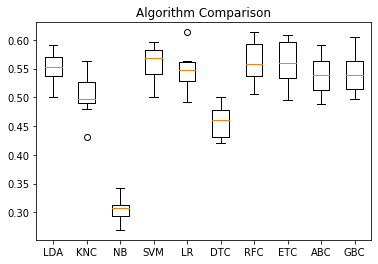

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Spot Check Algorithms
models = []

models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNC', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR',LogisticRegression(solver='lbfgs')))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier(n_estimators=500)))
models.append(('ETC',ExtraTreesClassifier(n_estimators=500)))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
              
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=78, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()} ({cv_results.std()})')
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# KNeighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=500)

In [23]:
kn_model = kn_model.fit(X_train_scaled, y_train)

In [24]:
# Run the test with model
y_pred = kn_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.52734375

In [25]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,60,108,1,11
Actual 2,14,181,1,43
Actual 3,1,83,5,67
Actual 4,1,33,0,159


In [26]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.33      0.47       180
           2       0.45      0.76      0.56       239
           3       0.71      0.03      0.06       156
           4       0.57      0.82      0.67       193

    accuracy                           0.53       768
   macro avg       0.63      0.49      0.44       768
weighted avg       0.61      0.53      0.47       768



# SVM

In [27]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')

In [28]:
svc_model = svc_model.fit(X_train_scaled, y_train)

In [29]:
# Run the test with model
y_pred = svc_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.546875

In [30]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,97,72,4,7
Actual 2,36,153,28,22
Actual 3,7,59,41,49
Actual 4,4,25,35,129


In [31]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.67      0.54      0.60       180
           2       0.50      0.64      0.56       239
           3       0.38      0.26      0.31       156
           4       0.62      0.67      0.65       193

    accuracy                           0.55       768
   macro avg       0.54      0.53      0.53       768
weighted avg       0.55      0.55      0.54       768



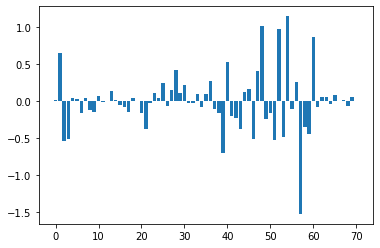

[(1.1517660277567199, 'Unreported_Insurance'),
 (1.0158114233217912, 'Male_Over_60'),
 (0.9767881862293519, 'Uninsured'),
 (0.8674669077438519, 'Unreported_education'),
 (0.6491626025495236, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.5273274237257581, 'Population_NHW'),
 (0.41860973386738465, 'Median_Household_Income'),
 (0.4052048802770596, 'Male_30-59'),
 (0.2747141420343855, 'Population_AIAN'),
 (0.2587134592145024, 'Less_than_high_school')]

In [32]:
# get importance
importances = svc_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Linear Discriminant Analysis

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

In [34]:
lda_model = lda_model.fit(X_train_scaled, y_train)

In [35]:
# Run the test with model
y_pred = lda_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5494791666666666

In [36]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,92,78,5,5
Actual 2,35,156,22,26
Actual 3,5,66,39,46
Actual 4,2,27,29,135


In [37]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.51      0.59       180
           2       0.48      0.65      0.55       239
           3       0.41      0.25      0.31       156
           4       0.64      0.70      0.67       193

    accuracy                           0.55       768
   macro avg       0.55      0.53      0.53       768
weighted avg       0.55      0.55      0.54       768



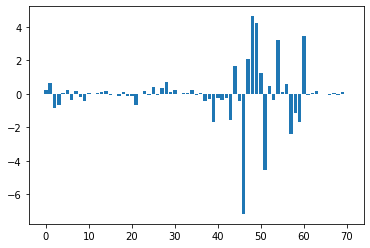

[(4.630327165008662, 'Male_Over_60'),
 (4.207750177856377, 'Female_Under_30'),
 (3.4430667471938907, 'Unreported_education'),
 (3.2250391336812965, 'Unreported_Insurance'),
 (2.0557128807196023, 'Male_30-59'),
 (1.630663743566865, 'Pop_Between_30-59'),
 (1.2115221410876647, 'Female_30-59'),
 (0.7106737911563532, 'Median_Household_Income'),
 (0.6307438650757227, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.5854927929336918, 'Less_than_high_school')]

In [38]:
# get importance
importances = lda_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Logistic Regression

In [39]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', random_state=78)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=78, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Run the test with model
y_pred = lr_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.55078125

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,103,67,4,6
Actual 2,39,150,24,26
Actual 3,7,59,36,54
Actual 4,7,21,31,134


In [42]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.66      0.57      0.61       180
           2       0.51      0.63      0.56       239
           3       0.38      0.23      0.29       156
           4       0.61      0.69      0.65       193

    accuracy                           0.55       768
   macro avg       0.54      0.53      0.53       768
weighted avg       0.54      0.55      0.54       768



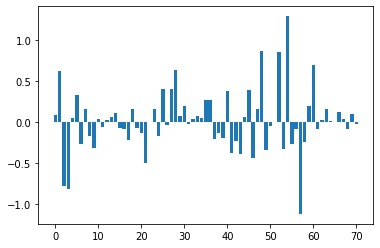

[(1.2942770581891823, 'Unreported_Insurance'),
 (0.8749920001422725, 'Male_Over_60'),
 (0.8559773945794609, 'Uninsured'),
 (0.6956488876879374, 'Unreported_education'),
 (0.6322344512859431, 'Median_Household_Income'),
 (0.6222074118741455, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.4072204233084917, 'Percent_Limited_Access_to_Healthy_Foods'),
 (0.40302606386692313, 'Percent_Long_Commute'),
 (0.39150678194242894, 'Pop_Over_60'),
 (0.38642478948775677, 'Population_NHW')]

In [43]:
# get importance
importances = lr_model.coef_[0]
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]


# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
# Create a model Decision Tree
dt_model =  DecisionTreeClassifier(random_state=78) 

In [45]:
dt_model = dt_model.fit(X_train_scaled, y_train)

In [46]:
# Run the test with model
y_pred = dt_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5091145833333334

In [47]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,99,56,12,13
Actual 2,48,123,45,23
Actual 3,13,42,51,50
Actual 4,5,26,44,118


In [48]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.60      0.55      0.57       180
           2       0.50      0.51      0.51       239
           3       0.34      0.33      0.33       156
           4       0.58      0.61      0.59       193

    accuracy                           0.51       768
   macro avg       0.50      0.50      0.50       768
weighted avg       0.51      0.51      0.51       768



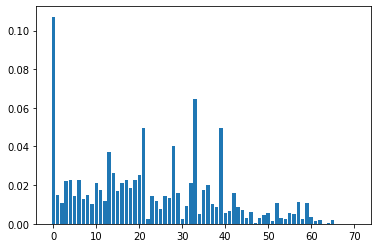

[(0.10714638001601101, 'Percent_Fair_or_Poor_Health'),
 (0.06431702091341185, 'Household_Income_White'),
 (0.049806705307072784, 'Population_Hispanic'),
 (0.04964245178184223, 'Polution_Average_Daily_PM2.5'),
 (0.04047161185903654, 'Median_Household_Income'),
 (0.03696142403190313, 'Preventable_Hospitalization_Rate'),
 (0.026232826291301466, 'Percent_Vaccinated'),
 (0.025017309901327302, 'Violent_Crime_Rate'),
 (0.02291906590758991, 'Percent_Adults_with_Obesity'),
 (0.022917311322010338, 'Percent_Unemployed')]

In [49]:
importances = dt_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=2000, random_state=78, max_depth= 1000, criterion='entropy') 

In [51]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [52]:
# Run the test with model
y_pred = rf_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.59375

In [53]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,107,67,2,4
Actual 2,36,161,24,18
Actual 3,4,58,47,47
Actual 4,3,24,25,141


In [54]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.71      0.59      0.65       180
           2       0.52      0.67      0.59       239
           3       0.48      0.30      0.37       156
           4       0.67      0.73      0.70       193

    accuracy                           0.59       768
   macro avg       0.60      0.57      0.58       768
weighted avg       0.59      0.59      0.59       768



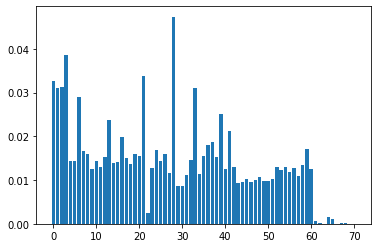

[(0.04733512653832824, 'Median_Household_Income'),
 (0.038665714054313814, 'Percent_Smokers'),
 (0.03386988442454613, 'Polution_Average_Daily_PM2.5'),
 (0.03266237592457155, 'Percent_Fair_or_Poor_Health'),
 (0.03135169747991667, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.031111171864362103, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.031109356962751997, 'Household_Income_White'),
 (0.029057784755703576, 'Percent_Physically_Inactive'),
 (0.025052801036217744, 'Population_Hispanic'),
 (0.023798729661359493, 'Preventable_Hospitalization_Rate')]

In [55]:
importances = rf_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Extra Trees

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
# Create a extra Trees classifier.
et_model = ExtraTreesClassifier(n_estimators=2000, random_state=78, max_depth =1000) 

In [57]:
et_model = et_model.fit(X_train_scaled, y_train)

In [58]:
# Run the test with model
y_pred = et_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5885416666666666

In [59]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,103,70,3,4
Actual 2,38,160,20,21
Actual 3,5,57,43,51
Actual 4,3,23,21,146


In [60]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.69      0.57      0.63       180
           2       0.52      0.67      0.58       239
           3       0.49      0.28      0.35       156
           4       0.66      0.76      0.70       193

    accuracy                           0.59       768
   macro avg       0.59      0.57      0.57       768
weighted avg       0.59      0.59      0.58       768



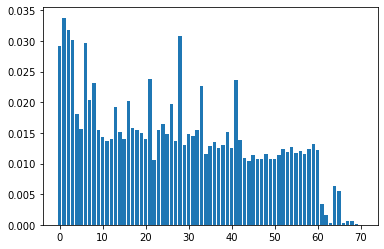

[(0.0337878489386957, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.03184062799754305, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.03087445720366776, 'Median_Household_Income'),
 (0.030083015476670746, 'Percent_Smokers'),
 (0.02962876749051311, 'Percent_Physically_Inactive'),
 (0.029129825169810362, 'Percent_Fair_or_Poor_Health'),
 (0.02385227010111503, 'Polution_Average_Daily_PM2.5'),
 (0.023611984034320372, 'Percent_Insufficient_Sleep'),
 (0.02318305911158633, 'Percent_Excessive_Drinking'),
 (0.02262889902673131, 'Household_Income_White')]

In [61]:
importances = et_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Ada Boost

In [62]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=256)

In [63]:
ab_model = ab_model.fit(X_train_scaled, y_train)

In [64]:
# Run the test with model
y_pred = ab_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5234375

In [65]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,126,48,4,2
Actual 2,77,101,38,23
Actual 3,12,46,38,60
Actual 4,5,21,30,137


In [66]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.57      0.70      0.63       180
           2       0.47      0.42      0.44       239
           3       0.35      0.24      0.29       156
           4       0.62      0.71      0.66       193

    accuracy                           0.52       768
   macro avg       0.50      0.52      0.50       768
weighted avg       0.51      0.52      0.51       768



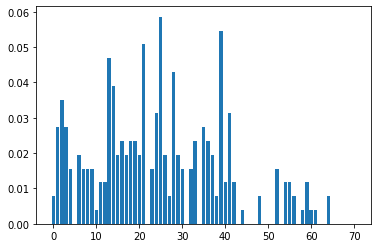

[(0.05859375, 'Percent_Long_Commute'),
 (0.0546875, 'Population_Hispanic'),
 (0.05078125, 'Polution_Average_Daily_PM2.5'),
 (0.046875, 'Preventable_Hospitalization_Rate'),
 (0.04296875, 'Median_Household_Income'),
 (0.0390625, 'Percent_Vaccinated'),
 (0.03515625, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.03125, 'Percent_Insufficient_Sleep'),
 (0.03125, 'Percent_Drive_Alone_to_Work'),
 (0.02734375, 'Population_Black')]

In [67]:
importances = ab_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

# Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=78)

In [69]:
gb_model = gb_model.fit(X_train_scaled, y_train)

In [70]:
# Run the test with model
y_pred = gb_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5859375

In [71]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,108,66,3,3
Actual 2,37,154,34,14
Actual 3,6,57,45,48
Actual 4,8,20,22,143


In [72]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.68      0.60      0.64       180
           2       0.52      0.64      0.57       239
           3       0.43      0.29      0.35       156
           4       0.69      0.74      0.71       193

    accuracy                           0.59       768
   macro avg       0.58      0.57      0.57       768
weighted avg       0.58      0.59      0.58       768



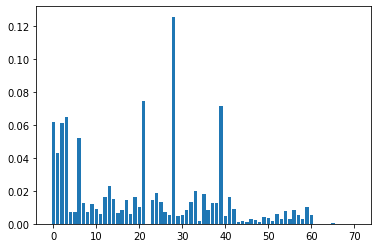

[(0.12593622319174505, 'Median_Household_Income'),
 (0.07444440524725564, 'Polution_Average_Daily_PM2.5'),
 (0.07136168076723179, 'Population_Hispanic'),
 (0.06489861452324415, 'Percent_Smokers'),
 (0.06216859930378603, 'Percent_Fair_or_Poor_Health'),
 (0.06133825180786405, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.05223177623383616, 'Percent_Physically_Inactive'),
 (0.04295674224690123, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.02276852419775492, 'Preventable_Hospitalization_Rate'),
 (0.019921239057294787, 'Household_Income_White')]

In [73]:
importances = gb_model.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importances))], importances)
plt.show()
# summarize feature importance
sorted(zip(importances, X.columns), reverse=True)[:10]

In [74]:
# Change target to train with Deep learning
# High (3,4) or Low (1,2)
y_test =np.array([1 if x in [3,4] else 0 for x in y_test])
y_train =np.array([1 if x in [3,4] else 0 for x in y_train])

# Deep Learning

In [75]:
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features*3
hidden_nodes_layer2 = number_input_features*2
hidden_nodes_layer3 = number_input_features*1
hidden_nodes_layer4 = number_input_features//2


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fouth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 213)               15336     
_________________________________________________________________
dense_1 (Dense)              (None, 142)               30388     
_________________________________________________________________
dense_2 (Dense)              (None, 71)                10153     
_________________________________________________________________
dense_3 (Dense)              (None, 35)                2520      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 36        
Total params: 58,433
Trainable params: 58,433
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [77]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 2304 samples
Epoch 1/100
2304/2304 [==============================] - 1s 285us/sample - loss: 0.4538 - accuracy: 0.7977
Epoch 2/100
2304/2304 [==============================] - 0s 80us/sample - loss: 0.3889 - accuracy: 0.8416
Epoch 3/100
2304/2304 [==============================] - 0s 85us/sample - loss: 0.3592 - accuracy: 0.8520
Epoch 4/100
2304/2304 [==============================] - 0s 74us/sample - loss: 0.3250 - accuracy: 0.8668
Epoch 5/100
2304/2304 [==============================] - 0s 69us/sample - loss: 0.3009 - accuracy: 0.8767
Epoch 6/100
2304/2304 [==============================] - 0s 85us/sample - loss: 0.2683 - accuracy: 0.8945
Epoch 7/100
2304/2304 [==============================] - 0s 84us/sample - loss: 0.2375 - accuracy: 0.9110
Epoch 8/100
2304/2304 [==============================] - 0s 71us/sample - loss: 0.2053 - accuracy: 0.9197
Epoch 9/100
2304/2304 [==============================] - 0s 67us/sample - loss: 0.1710 - accuracy: 0.9319
Epoch 10/100
2304/2304 

In [78]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

768/768 - 0s - loss: 1.9448 - accuracy: 0.8151
Loss: 1.9447876339157422, Accuracy: 0.8151041865348816


# PCA

In [ ]:
#using Principle Component Analysis find few PCA and the feature contribution to each one of them

In [104]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [105]:
#Initialize PCA model
pca = PCA(n_components=5)

In [106]:
hd_pca = pca.fit_transform(X_train_scaled)
#let's check the shape of hd_pca array
print ("shape of X_pca", hd_pca.shape)

shape of X_pca (921, 5)


In [107]:
#once pca is trained lets get the variance ratio and its details
ex_variance=np.var(hd_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio )

[0.54413712 0.22483589 0.0924242  0.09007151 0.04853128]


In [108]:
#Based on variance ration the variance ratio for each one of the PCA is
#PCA1 = 0.544, PCA2 = 0.225, PCA3 = 0.0924, PCA4 = 0.0901, PCA5 = 0.0485
# Knowing PCA is good but it would be clear if we can see which features contribute to each one of the PCA

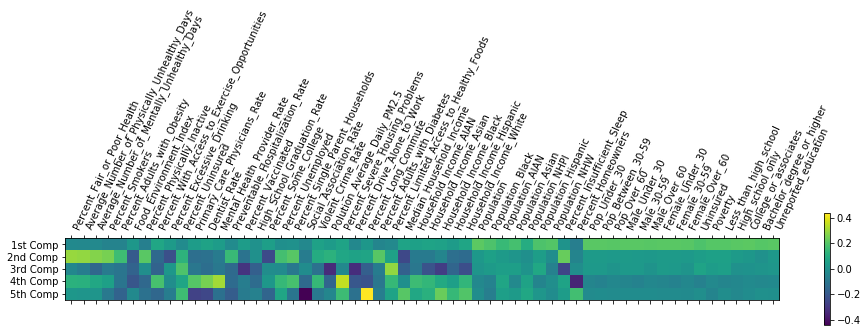

In [109]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp', '4th Comp', '5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()